<a href="https://colab.research.google.com/github/cool60334/Team_Project_Model/blob/main/Model_1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# 讀取csv檔案
f = pd.read_csv("台北市房屋交易_1108_2.csv", encoding = "utf-8")
pd.set_option('display.max_columns', 500)  # 增加顯示的列數

In [ ]:
f

In [ ]:
f = f.drop(["dis", "sign", "add", "zone", "tradeymd", "state", "mainuse", "mater", "comy", "parkcat", "tradeyr", "buildyr"], axis=1)

In [ ]:
f

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # 讓圖變好看
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split # 回傳(特徵90%，特徵10%，目標90%，目標10%)

In [ ]:
import numpy as np

In [ ]:
x = np.array(f.drop(["tp","unitp","parkp"], axis = 1))

In [ ]:
y = np.array(f["tp"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=11)
reg.fit(x_train, y_train)


# max_depth=5 0.25 ~ 0.29
# max_depth=6 0.28 ~ 0.32
# max_depth=7 0.31 ~ 0.35
# max_depth=8 0.31 ~ 0.40 
# max_depth=9 0.32 ~ 0.39
# max_depth=10 0.34 ~ 0.39
# max_depth=11 0.34 ~ 0.42

DecisionTreeRegressor(max_depth=11)

In [ ]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.38389483224629284

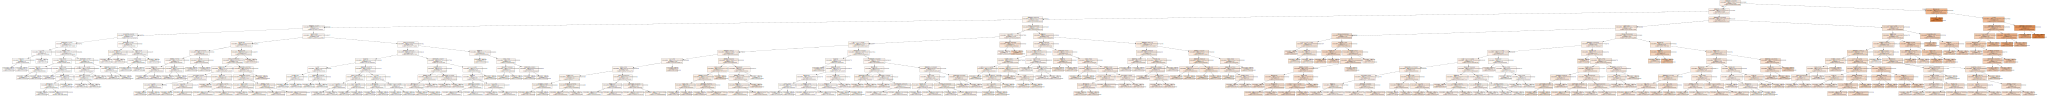

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(reg, out_file=None, 
            feature_names=f.drop(["tp","unitp","parkp"], axis = 1).columns,     
            filled=True, special_characters=True)

graph = graphviz.Source(g)
graph